In [29]:
import numpy as np
import pandas as pd
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error, roc_curve, classification_report,auc)
import matplotlib.pyplot as plt


In [82]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [69]:
df = pd.read_csv('./dataset/traindata.csv', index_col = 0)

<Axes: xlabel='target'>

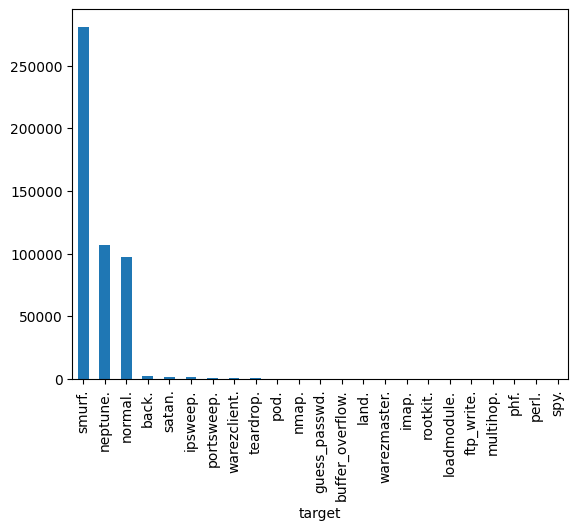

In [31]:
df['target'].value_counts().plot(kind='bar')


In [70]:
df['target'].replace(['normal.','buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],inplace=True)

In [71]:
from sklearn.preprocessing import LabelEncoder
val = df.select_dtypes(exclude=[np.number])
print(val.columns)
for feature in val.columns:
    df[feature] = LabelEncoder().fit_transform(df[feature])


Index(['protocol_type', 'service', 'flag'], dtype='object')


In [72]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [73]:
data = df.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=0.05))


In [74]:
# Separating the independent variables from dependent variables
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)


In [76]:
print("Before oversampling: ",Counter(y_train))


Before oversampling:  Counter({1: 13856, 0: 3434})


In [77]:
SMOTE = SMOTE()


In [78]:
# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

After oversampling:  Counter({1: 13856, 0: 13856})


In [79]:
#PART 2
# import SVM libraries 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

model=SVC()
clf_SMOTE = model.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test)

print("ROC AUC score for oversampled SMOTE data: ", roc_auc_score(y_test, pred_SMOTE))

ROC AUC score for oversampled SMOTE data:  0.985923723492692


In [84]:
batch_size = 64


In [85]:
model = Sequential()
model.add(Dense(1024,input_dim=41,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(128,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
checkpointer = callbacks.ModelCheckpoint(filepath="improveresults/dnn5layer/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='loss')
csv_logger = CSVLogger('improveresults/dnn5layer/training_set_dnnanalysis.csv',separator=',', append=False)
model.fit(X_train_SMOTE, y_train_SMOTE, validation_data=(X_test, y_test),batch_size=batch_size, epochs=10, callbacks=[checkpointer,csv_logger])
model.save("improveresults/dnn5layer/dnn5layer_model.hdf5")

Epoch 1/10
432/433 [============================>.] - ETA: 0s - loss: 21.3702 - accuracy: 0.9549
Epoch 1: loss improved from inf to 21.32088, saving model to improveresults/dnn5layer/checkpoint-01.hdf5
433/433 [==============================] - 17s 35ms/step - loss: 21.3209 - accuracy: 0.9550 - val_loss: 76.2287 - val_accuracy: 0.9876
Epoch 2/10
433/433 [==============================] - ETA: 0s - loss: 17.9858 - accuracy: 0.9789
Epoch 2: loss improved from 21.32088 to 17.98579, saving model to improveresults/dnn5layer/checkpoint-02.hdf5
433/433 [==============================] - 16s 37ms/step - loss: 17.9858 - accuracy: 0.9789 - val_loss: 85.0988 - val_accuracy: 0.9883
Epoch 3/10
432/433 [============================>.] - ETA: 0s - loss: 8.5628 - accuracy: 0.9806
Epoch 3: loss improved from 17.98579 to 8.54307, saving model to improveresults/dnn5layer/checkpoint-03.hdf5
433/433 [==============================] - 15s 35ms/step - loss: 8.5431 - accuracy: 0.9807 - val_loss: 33.7251 - val